In [59]:
import pandas as pd
import numpy as np

In [60]:
# Loading dataset
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [61]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    str    
 1   Customer_Location           200 non-null    str    
 2   Restaurant_Location         200 non-null    str    
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    str    
 5   Traffic_Conditions          200 non-null    str    
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    str    
 8   Order_Time                  200 non-null    str    
 9   Vehicle_Type                200 non-null    str    
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non-null    fl

In [62]:
# Handling missing values
df.isna().sum()

Order_ID                      0
Customer_Location             0
Restaurant_Location           0
Distance                      0
Weather_Conditions            0
Traffic_Conditions            0
Delivery_Person_Experience    0
Order_Priority                0
Order_Time                    0
Vehicle_Type                  0
Restaurant_Rating             0
Customer_Rating               0
Delivery_Time                 0
Order_Cost                    0
Tip_Amount                    0
dtype: int64

In [63]:
df.dtypes

Order_ID                          str
Customer_Location                 str
Restaurant_Location               str
Distance                      float64
Weather_Conditions                str
Traffic_Conditions                str
Delivery_Person_Experience      int64
Order_Priority                    str
Order_Time                        str
Vehicle_Type                      str
Restaurant_Rating             float64
Customer_Rating               float64
Delivery_Time                 float64
Order_Cost                    float64
Tip_Amount                    float64
dtype: object

In [64]:
df = pd.get_dummies(df, columns=["Weather_Conditions", "Traffic_Conditions", "Vehicle_Type"])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,4,Medium,Afternoon,4.1,3.0,26.22,...,False,True,False,False,False,False,True,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,8,Low,Night,4.5,4.2,62.61,...,True,False,False,False,False,False,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,9,High,Night,3.3,3.4,48.43,...,False,False,True,False,False,False,True,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,2,Medium,Evening,3.2,3.7,111.63,...,True,False,False,False,False,True,False,False,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,6,Low,Night,3.5,2.8,32.38,...,False,True,False,False,True,False,False,False,True,False


In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
columns = ["Distance", "Delivery_Time", "Order_Cost"]
scaler = StandardScaler()
df[columns] = scaler.fit_transform(df[columns])

In [67]:
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Priority,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,...,Weather_Conditions_Cloudy,Weather_Conditions_Rainy,Weather_Conditions_Snowy,Weather_Conditions_Sunny,Traffic_Conditions_High,Traffic_Conditions_Low,Traffic_Conditions_Medium,Vehicle_Type_Bicycle,Vehicle_Type_Bike,Vehicle_Type_Car
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,4,Medium,Afternoon,4.1,3.0,-1.487932,...,False,True,False,False,False,False,True,False,False,True
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,8,Low,Night,4.5,4.2,-0.264987,...,True,False,False,False,False,False,True,False,False,True
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,9,High,Night,3.3,3.4,-0.741529,...,False,False,True,False,False,False,True,False,True,False
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,2,Medium,Evening,3.2,3.7,1.382411,...,True,False,False,False,False,True,False,False,True,False
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,6,Low,Night,3.5,2.8,-1.280915,...,False,True,False,False,True,False,False,False,True,False


In [68]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,2.000000e+02,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,-1.643130e-16,5.250000,3.738500,3.686500,3.730349e-16,-2.042810e-16,46.616650
std,1.002509e+00,2.745027,0.703021,0.697063,1.002509e+00,1.002509e+00,29.361706
min,-1.608593e+00,1.000000,2.500000,2.600000,-1.857269e+00,-1.688954e+00,1.240000
25%,-7.924313e-01,3.000000,3.200000,3.100000,-7.896704e-01,-9.013569e-01,21.602500
50%,-1.806765e-01,5.000000,3.800000,3.700000,7.662482e-02,-1.925947e-02,47.530000
75%,7.325599e-01,8.000000,4.300000,4.300000,8.789834e-01,9.076026e-01,70.245000
max,1.963762e+00,10.000000,5.000000,5.000000,1.652608e+00,1.737826e+00,99.740000


In [69]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

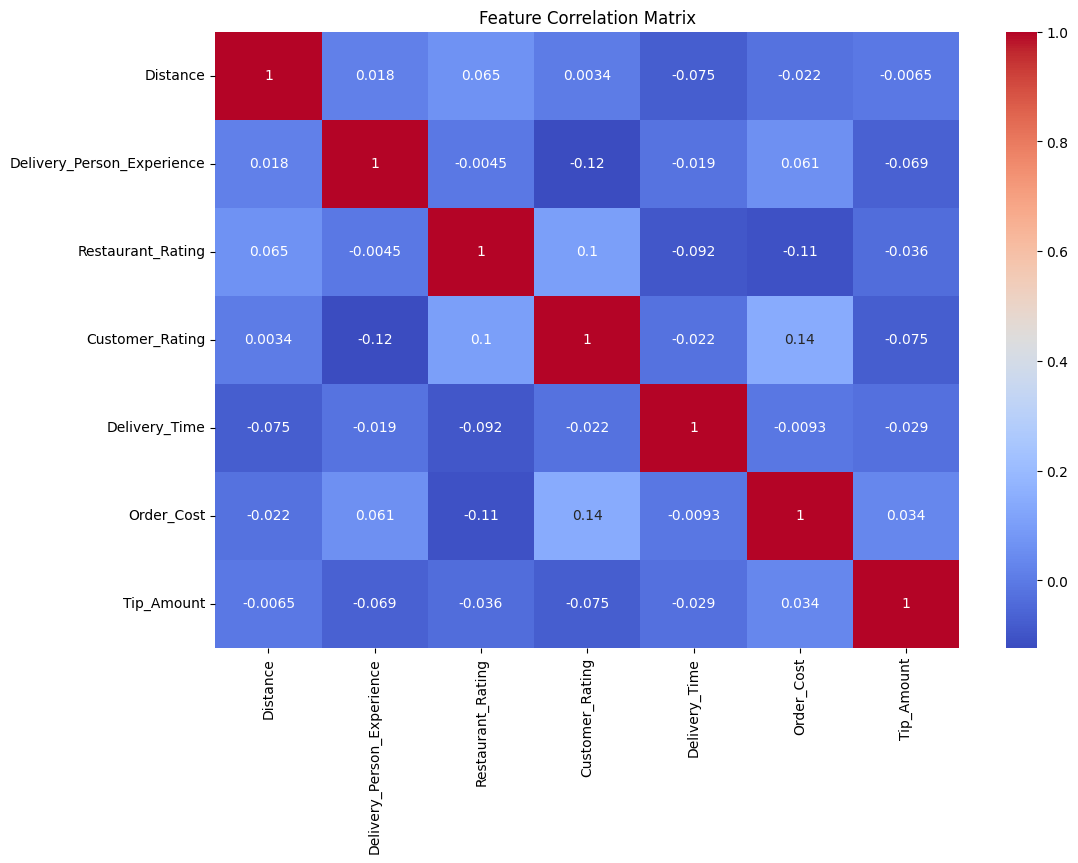

In [70]:
numeric_df = df.select_dtypes(include='number') # # Compute correlation matrix using numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

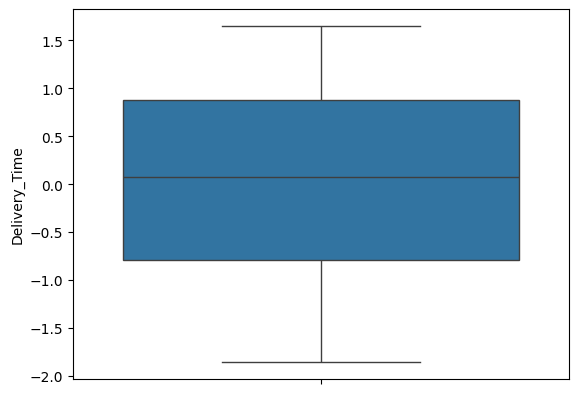

In [71]:
# Outlier Detection using Boxplot
sns.boxplot(df["Delivery_Time"])
plt.show()

In [72]:
Q1 = df['Delivery_Time'].quantile(0.25)
Q3 = df['Delivery_Time'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Delivery_Time'] >= Q1 - 1.5 * IQR) & (df['Delivery_Time'] <= Q3 + 1.5 * IQR)]

print(f"{Q1= }, {Q3= }, {IQR= }")
df.info()

Q1= np.float64(-0.789670350816316), Q3= np.float64(0.878983358156664), IQR= np.float64(1.6686537089729798)
<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    str    
 1   Customer_Location           200 non-null    str    
 2   Restaurant_Location         200 non-null    str    
 3   Distance                    200 non-null    float64
 4   Delivery_Person_Experience  200 non-null    int64  
 5   Order_Priority              200 non-null    str    
 6   Order_Time                  200 non-null    str    
 7   Restaurant_Rating           200 non-null    float64
 8   Customer_Rating             200 non-null    float64
 9   Delivery_Time               200 non-null    float64
 10  Order_Cost                  200 non-null    float64
 11  Tip_Amount                  200 non-null    float64
 

In [73]:
# Distance Calculation
df['Rush_Hour'] = df['Hour'].apply(lambda x: 1 if x in [7,8,9,17,18,19] else 0) if 'Hour' in df.columns else 0

In [74]:
df["Rush_Hour"].value_counts()

Rush_Hour
0    200
Name: count, dtype: int64

In [75]:
# Model Building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

df_model = df.copy() # Make a copy of dataframe
df_model = df_model.drop(columns=['Order_ID', 'Customer_Location', 'Restaurant_Location', 
    'Order_Priority', 'Order_Time'])

df_model = df_model.astype({col: int for col in df_model.select_dtypes('bool').columns})

In [76]:
X = df_model.drop('Delivery_Time', axis=1)
y = df_model['Delivery_Time']

In [77]:
# Train-Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 17), (40, 17), (160,), (40,))

In [78]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [79]:
# Evaluation
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

MSE: 1.2562034084450369
MAE: 0.946149242891348
R² Score: -0.1958029513755446


In [80]:
# Classify as 1 = Delayed, 0 = Fast using median as threshold
df_model['Delivery_Status'] = df_model['Delivery_Time'].apply(
                            lambda x: 1 if x > df_model['Delivery_Time'].median() else 0)


In [81]:
# Model Implementation
X_class = df_model.drop(['Delivery_Time', 'Delivery_Status'], axis=1)
y_class = df_model['Delivery_Status']

In [82]:
# Train-Test Split
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, train_size=0.8, test_size=0.2, random_state=20)

In [83]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xc_train, yc_train)
yc_pred = logreg.predict(Xc_test)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print(f"Accuracy: {accuracy_score(yc_test, yc_pred)}")
print(f"Precision: {precision_score(yc_test, yc_pred)}")
print(f"Recall: {recall_score(yc_test, yc_pred)}")
print(f"F1 Score: {f1_score(yc_test, yc_pred)}")
print(f"\nConfusion Matrix:\n {confusion_matrix(yc_test, yc_pred)}")
print(f"\nClassification Report:\n {classification_report(yc_test, yc_pred)}")

Accuracy: 0.475
Precision: 0.45454545454545453
Recall: 0.5263157894736842
F1 Score: 0.4878048780487805

Confusion Matrix:
 [[ 9 12]
 [ 9 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.43      0.46        21
           1       0.45      0.53      0.49        19

    accuracy                           0.47        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.47      0.47        40



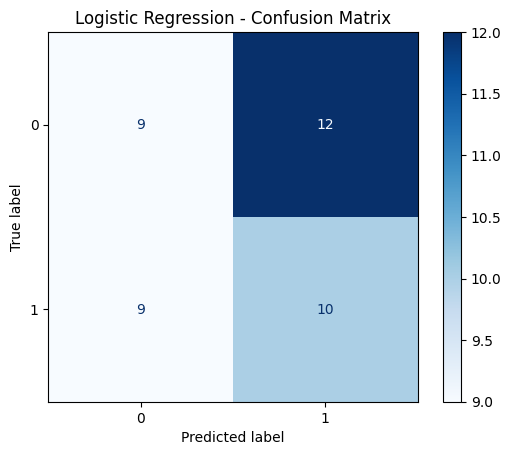

In [85]:
# import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(logreg, Xc_test, yc_test, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

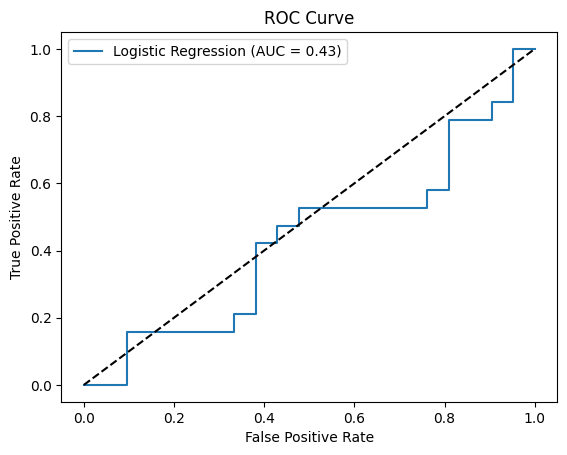

In [86]:
# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(yc_test, logreg.predict_proba(Xc_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(yc_test, logreg.predict_proba(Xc_test)[:,1])))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [87]:
print(f"🔹 Linear Regression Evaluation:")
print(f"  MSE      : {mean_squared_error(y_test, y_pred):.2f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_pred):.2f}")
print(f"  R² Score : {r2_score(y_test, y_pred):.2f}")

print(f"\n🔹 Logistic Regression Evaluation:")
print(f"  Accuracy : {accuracy_score(yc_test, yc_pred):.2f}")
print(f"  Precision: {precision_score(yc_test, yc_pred):.2f}")
print(f"  Recall   : {recall_score(yc_test, yc_pred):.2f}")
print(f"  F1 Score : {f1_score(yc_test, yc_pred):.2f}")

🔹 Linear Regression Evaluation:
  MSE      : 1.26
  MAE      : 0.95
  R² Score : -0.20

🔹 Logistic Regression Evaluation:
  Accuracy : 0.47
  Precision: 0.45
  Recall   : 0.53
  F1 Score : 0.49
